# 1. 데이터 불러오기

In [3]:
import pandas as pd

df = pd.read_csv(
    "./data/서울특별시 공공자전거 이용정보(월별)_25.7-12.csv",
    encoding="CP949"
)

df.head()


,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,202507,102,102. 망원역 1번출구 앞,일일권,NaN,20대,68,5353.58,51.93,224057.74,1849
1,202507,102,102. 망원역 1번출구 앞,일일권,NaN,30대,65,6345.95,54.21,233558.04,1773
2,202507,102,102. 망원역 1번출구 앞,일일권,NaN,40대,11,378.59,3.54,15314.12,122
3,202507,102,102. 망원역 1번출구 앞,일일권,NaN,50대,4,169.09,1.46,6287.07,100
4,202507,102,102. 망원역 1번출구 앞,일일권,NaN,60대,1,69.20,0.42,1820.25,9


# 2. 데이터 전처리

## 1) 데이터 정보 확인하기

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629975 entries, 0 to 629974
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   대여일자     629975 non-null  int64  
 1   대여소번호    629975 non-null  int64  
 2   대여소명     629975 non-null  object 
 3   대여구분코드   629975 non-null  object 
 4   성별       437187 non-null  object 
 5   연령대코드    629975 non-null  object 
 6   이용건수     629975 non-null  int64  
 7   운동량      629392 non-null  float64
 8   탄소량      629392 non-null  float64
 9   이동거리(M)  629975 non-null  float64
 10  이용시간(분)  629975 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 52.9+ MB


## 2) 데이터 형 변환

In [5]:
df["대여일자"] = pd.to_datetime(df["대여일자"], format="%Y%m")

## 3) 결측치 처리

In [6]:
# df.isnull().sum()
df.isna().sum()

대여일자            0
대여소번호           0
대여소명            0
대여구분코드          0
성별         192788
연령대코드           0
이용건수            0
운동량           583
탄소량           583
이동거리(M)         0
이용시간(분)         0
dtype: int64

In [7]:
df["성별"] = df["성별"].fillna("미상")
df.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2025-07-01,102,102. 망원역 1번출구 앞,일일권,미상,20대,68,5353.58,51.93,224057.74,1849
1,2025-07-01,102,102. 망원역 1번출구 앞,일일권,미상,30대,65,6345.95,54.21,233558.04,1773
2,2025-07-01,102,102. 망원역 1번출구 앞,일일권,미상,40대,11,378.59,3.54,15314.12,122
3,2025-07-01,102,102. 망원역 1번출구 앞,일일권,미상,50대,4,169.09,1.46,6287.07,100
4,2025-07-01,102,102. 망원역 1번출구 앞,일일권,미상,60대,1,69.20,0.42,1820.25,9


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629975 entries, 0 to 629974
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   대여일자     629975 non-null  datetime64[ns]
 1   대여소번호    629975 non-null  int64         
 2   대여소명     629975 non-null  object        
 3   대여구분코드   629975 non-null  object        
 4   성별       629975 non-null  object        
 5   연령대코드    629975 non-null  object        
 6   이용건수     629975 non-null  int64         
 7   운동량      629392 non-null  float64       
 8   탄소량      629392 non-null  float64       
 9   이동거리(M)  629975 non-null  float64       
 10  이용시간(분)  629975 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 52.9+ MB


In [9]:
df["운동량"].isna()
df["운동량"] = df["운동량"].fillna(0)

df["탄소량"] = df["탄소량"].fillna(0)

In [10]:
df.describe()

,대여일자,대여소번호,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
count,629975,629975.000000,629975.000000,629975.000000,629975.000000,6.299750e+05,629975.000000
mean,2025-09-14 16:41:37.424818432,2441.959981,31.188101,1869.107809,16.182052,7.009736e+04,635.473514
min,2025-07-01 00:00:00,102.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,2025-08-01 00:00:00,1018.000000,3.000000,194.845000,1.760000,7.638060e+03,71.000000
50%,2025-09-01 00:00:00,2119.000000,11.000000,668.640000,5.980000,2.594360e+04,235.000000
75%,2025-11-01 00:00:00,3956.000000,33.000000,2051.660000,18.080000,7.830514e+04,708.000000
max,2025-12-01 00:00:00,6190.000000,2168.000000,155418.840000,1515.530000,6.598829e+06,54779.000000
std,NaN,1649.317268,58.754097,3494.497714,29.542792,1.279532e+05,1134.422807


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629975 entries, 0 to 629974
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   대여일자     629975 non-null  datetime64[ns]
 1   대여소번호    629975 non-null  int64         
 2   대여소명     629975 non-null  object        
 3   대여구분코드   629975 non-null  object        
 4   성별       629975 non-null  object        
 5   연령대코드    629975 non-null  object        
 6   이용건수     629975 non-null  int64         
 7   운동량      629975 non-null  float64       
 8   탄소량      629975 non-null  float64       
 9   이동거리(M)  629975 non-null  float64       
 10  이용시간(분)  629975 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 52.9+ MB


In [12]:
pd.options.display.float_format = '{:.2f}'.format

In [13]:
df.describe()

,대여일자,대여소번호,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
count,629975,629975.00,629975.00,629975.00,629975.00,629975.00,629975.00
mean,2025-09-14 16:41:37.424818432,2441.96,31.19,1869.11,16.18,70097.36,635.47
min,2025-07-01 00:00:00,102.00,1.00,0.00,0.00,0.00,0.00
25%,2025-08-01 00:00:00,1018.00,3.00,194.84,1.76,7638.06,71.00
50%,2025-09-01 00:00:00,2119.00,11.00,668.64,5.98,25943.60,235.00
75%,2025-11-01 00:00:00,3956.00,33.00,2051.66,18.08,78305.14,708.00
max,2025-12-01 00:00:00,6190.00,2168.00,155418.84,1515.53,6598829.21,54779.00
std,NaN,1649.32,58.75,3494.50,29.54,127953.25,1134.42


In [14]:
df.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2025-07-01,102,102. 망원역 1번출구 앞,일일권,미상,20대,68,5353.58,51.93,224057.74,1849
1,2025-07-01,102,102. 망원역 1번출구 앞,일일권,미상,30대,65,6345.95,54.21,233558.04,1773
2,2025-07-01,102,102. 망원역 1번출구 앞,일일권,미상,40대,11,378.59,3.54,15314.12,122
3,2025-07-01,102,102. 망원역 1번출구 앞,일일권,미상,50대,4,169.09,1.46,6287.07,100
4,2025-07-01,102,102. 망원역 1번출구 앞,일일권,미상,60대,1,69.20,0.42,1820.25,9


# 3. 시각화

In [15]:
df.groupby("연령대코드")

In [16]:
df.groupby("연령대코드")["이용건수"].sum()

연령대코드
20대      5097841
30대      5302908
40대      3324401
50대      2323116
60대       850095
70대이상     156221
~10대     1274213
기타       1318929
Name: 이용건수, dtype: int64

In [17]:
result = df.groupby("연령대코드")["이용건수"].sum().sort_values(ascending=False)

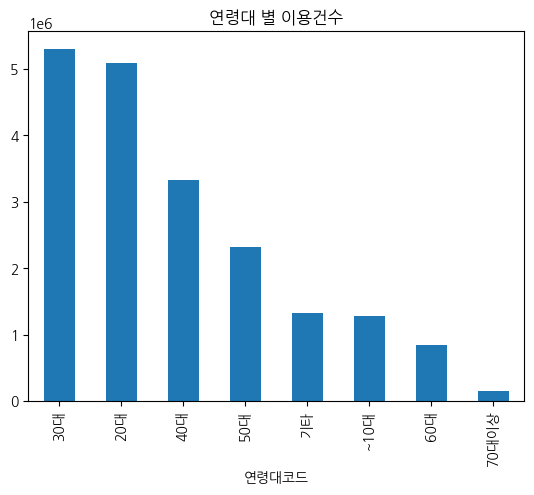

In [18]:
import koreanize_matplotlib  # noqa: F401
import matplotlib.pyplot as plt

result.plot(kind="bar")
plt.title("연령대 별 이용건수")
plt.show()


In [19]:
df.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2025-07-01,102,102. 망원역 1번출구 앞,일일권,미상,20대,68,5353.58,51.93,224057.74,1849
1,2025-07-01,102,102. 망원역 1번출구 앞,일일권,미상,30대,65,6345.95,54.21,233558.04,1773
2,2025-07-01,102,102. 망원역 1번출구 앞,일일권,미상,40대,11,378.59,3.54,15314.12,122
3,2025-07-01,102,102. 망원역 1번출구 앞,일일권,미상,50대,4,169.09,1.46,6287.07,100
4,2025-07-01,102,102. 망원역 1번출구 앞,일일권,미상,60대,1,69.20,0.42,1820.25,9


In [20]:
df.groupby("대여소명")

In [21]:
df.groupby("대여소명")["이용건수"].sum().sort_values(ascending=False).head(10)

대여소명
2715.마곡나루역 2번 출구           86780
2728.마곡나루역 3번 출구           59620
1210. 롯데월드타워(잠실역2번출구 쪽)    58147
2701. 마곡나루역 5번출구 뒤편        55683
230. 영등포구청역 7번출구           47229
1153. 발산역 1번, 9번 인근 대여소    45673
502. 자양(뚝섬한강공원)역 1번출구 앞    41392
2608. 송파구청                 37131
1124. 발산역 6번 출구 뒤          36211
5515.한강버스 망원 선착장           36062
Name: 이용건수, dtype: int64

In [22]:
# 여러 기준으로 그룹화
df.groupby(["대여소명", "연령대코드"])["이용건수"].sum()


대여소명                       연령대코드
1001. 광진교 남단 사거리(천호공원 방면)  20대      2367
                           30대      2486
                           40대      1162
                           50대      1118
                           60대       418
                                    ... 
996.응암역2번출구 국민은행 앞         50대      2193
                           60대       905
                           70대이상     164
                           ~10대      820
                           기타       1309
Name: 이용건수, Length: 22235, dtype: int64

In [23]:
df[df['대여소명'].str.contains('마곡나루')]['대여소명'].unique()

array(['1191. 마곡역 버스정류장(마곡나루역1번출구, 웰튼병원 방면)', '2701. 마곡나루역 5번출구 뒤편',
       '2715.마곡나루역 2번 출구 ', '2728.마곡나루역 3번 출구', '6190.마곡광장(마곡나루역 5번출구)'],
      dtype=object)

In [24]:
target_data = df[df['대여소명'] == '2715.마곡나루역 2번 출구 ']
print(target_data.head())

            대여일자  대여소번호               대여소명    대여구분코드  성별 연령대코드  이용건수     운동량  \
64521 2025-07-01   2715  2715.마곡나루역 2번 출구        가족권  미상  ~10대     1   47.82   
64522 2025-07-01   2715  2715.마곡나루역 2번 출구        가족권   F  ~10대    11  735.35   
64523 2025-07-01   2715  2715.마곡나루역 2번 출구        가족권   M  ~10대     2   64.28   
64524 2025-07-01   2715  2715.마곡나루역 2번 출구   가족권(2시간)   F  ~10대     6  498.57   
64525 2025-07-01   2715  2715.마곡나루역 2번 출구        일일권  미상   20대   200 7809.05   

        탄소량   이동거리(M)  이용시간(분)  
64521  0.37   1610.00       13  
64522  6.95  29880.91      241  
64523  0.52   2237.85       10  
64524  4.50  19368.99      161  
64525 74.33 322001.52     2875  


In [25]:
magok_data = df[df["대여소명"] == "2715.마곡나루역 2번 출구 "]
magok_data.groupby(["대여소명", "연령대코드"])["이용건수"].sum()

대여소명               연령대코드
2715.마곡나루역 2번 출구   20대      24342
                   30대      28331
                   40대      14717
                   50대       7416
                   60대       2516
                   70대이상      280
                   ~10대      2834
                   기타        6344
Name: 이용건수, dtype: int64

In [26]:
df["월"] = df["대여일자"].dt.month
df.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),월
0,2025-07-01,102,102. 망원역 1번출구 앞,일일권,미상,20대,68,5353.58,51.93,224057.74,1849,7
1,2025-07-01,102,102. 망원역 1번출구 앞,일일권,미상,30대,65,6345.95,54.21,233558.04,1773,7
2,2025-07-01,102,102. 망원역 1번출구 앞,일일권,미상,40대,11,378.59,3.54,15314.12,122,7
3,2025-07-01,102,102. 망원역 1번출구 앞,일일권,미상,50대,4,169.09,1.46,6287.07,100,7
4,2025-07-01,102,102. 망원역 1번출구 앞,일일권,미상,60대,1,69.20,0.42,1820.25,9,7


<Axes: xlabel='월'>

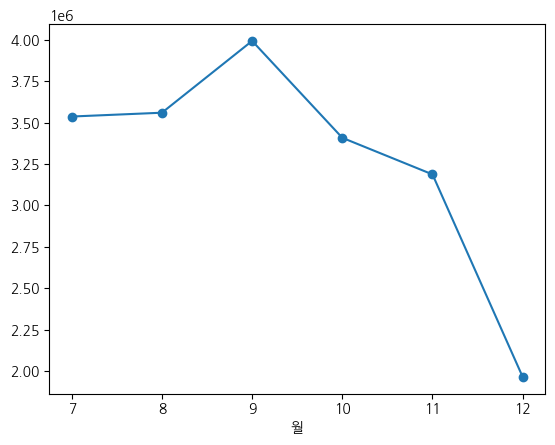

In [27]:
df.groupby("월")["이용건수"].sum().plot(kind="line", marker="o")

In [29]:
df.groupby("월")["이용건수"].sum()

월
7     3536203
8     3559225
9     3992326
10    3407811
11    3186985
12    1965174
Name: 이용건수, dtype: int64

In [30]:
df[["이동거리(M)", "이용시간(분)"]].mean()

이동거리(M)   70097.36
이용시간(분)     635.47
dtype: float64

In [32]:
df.groupby("연령대코드")[["이동거리(M)", "이용시간(분)"]].mean()

,이동거리(M),이용시간(분)
연령대코드,,
20대,109716.80,957.26
30대,115507.23,1053.32
40대,85659.52,776.78
50대,70862.74,644.51
60대,35830.35,362.50
70대이상,14374.65,157.91
~10대,35536.54,310.07
기타,32712.98,304.50


In [42]:
df["분당이동거리"] = (df["이동거리(M)"] / df["이용시간(분)"]).round(2)
df.head()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629975 entries, 0 to 629974
Data columns (total 13 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   대여일자     629975 non-null  datetime64[ns]
 1   대여소번호    629975 non-null  int64         
 2   대여소명     629975 non-null  object        
 3   대여구분코드   629975 non-null  object        
 4   성별       629975 non-null  object        
 5   연령대코드    629975 non-null  object        
 6   이용건수     629975 non-null  int64         
 7   운동량      629975 non-null  float64       
 8   탄소량      629975 non-null  float64       
 9   이동거리(M)  629975 non-null  float64       
 10  이용시간(분)  629975 non-null  int64         
 11  월        629975 non-null  int32         
 12  분당이동거리   629950 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int32(1), int64(3), object(4)
memory usage: 60.1+ MB


In [49]:
df_clean = df[df["이용시간(분)"] > 0].copy()
df_clean["분당이동거리"] = (df_clean["이동거리(M)"] / df_clean["이용시간(분)"]).round(2)
df_clean.head()

df_clean.groupby("연령대코드")["분당이동거리"].sum()


연령대코드
20대     11883765.47
30대     11469359.33
40대     10716833.90
50대      9814694.81
60대      6738360.21
70대이상    3067501.96
~10대     8750582.31
기타      11884857.94
Name: 분당이동거리, dtype: float64